
# 📘 Notebook Outline — Titanic Linear Regression (CSV) + EDA
**Goal:** Predict *Age* (continuous) using Kaggle-style Titanic CSV.

## 1) Introduction — What & Why
- **Definition:** Linear Regression models a continuous target as a weighted sum of features + intercept.
- **Why regression:** `Age` is numeric; we want a numeric estimate, not a class label.
- **Why Titanic:** Clean, small, relatable tabular dataset for teaching preprocessing + regression.

## 2) Load Dataset — Local CSV
- We use `pd.read_csv('titanic.csv')` to avoid internet/cert issues.
- Expected Kaggle columns (subset used): `Age, Pclass, Sex, SibSp, Parch, Fare, Embarked`.

## 3) EDA — Understand the data before modeling
- Inspect schema, missing values, and distributions.
- Visualize Age distribution; explore Age vs Pclass/Sex.

## 4) Data Preprocessing — Make data model-ready
- **Imputation:** median for numeric, most_frequent for categorical.
- **Encoding:** one‑hot for categorical (`Sex, Embarked`), include `Alone` as engineered feature.
- **Scaling:** standardize numeric features.

## 5) Train–Test Split — Honest evaluation

## 6) Model Training — Linear Regression

## 7) Evaluation — MAE / RMSE / R² + plots

## 8) Interpretation — coefficients (feature effects) + caveats


## Setup & Data Loading

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load local CSV (ensure 'titanic.csv' is in the same folder as this notebook)
df = pd.read_csv('titanic.csv')
print(df.shape)
df.head()


(5, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## EDA — Structure & Missing Values

In [5]:

# Data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  5 non-null      int64  
 1   Survived     5 non-null      int64  
 2   Pclass       5 non-null      int64  
 3   Name         5 non-null      object 
 4   Sex          5 non-null      object 
 5   Age          5 non-null      int64  
 6   SibSp        5 non-null      int64  
 7   Parch        5 non-null      int64  
 8   Ticket       5 non-null      object 
 9   Fare         5 non-null      float64
 10  Cabin        2 non-null      object 
 11  Embarked     5 non-null      object 
dtypes: float64(1), int64(6), object(5)
memory usage: 612.0+ bytes


In [6]:

# Missing values per column
df.isna().sum().sort_values(ascending=False)


Cabin          3
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:

# Numeric summary
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,5.0,NaN,NaN,NaN,3.0,1.581139,1.0,2.0,3.0,4.0,5.0
Survived,5.0,NaN,NaN,NaN,0.6,0.547723,0.0,0.0,1.0,1.0,1.0
Pclass,5.0,NaN,NaN,NaN,2.2,1.095445,1.0,1.0,3.0,3.0,3.0
Name,5,5,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,5,2,female,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,5.0,NaN,NaN,NaN,31.2,6.83374,22.0,26.0,35.0,35.0,38.0
SibSp,5.0,NaN,NaN,NaN,0.6,0.547723,0.0,0.0,1.0,1.0,1.0
Parch,5.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ticket,5,5,A/5 21171,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,5.0,NaN,NaN,NaN,29.52166,30.510029,7.25,7.925,8.05,53.1,71.2833


## EDA — Distributions & Simple Relationships

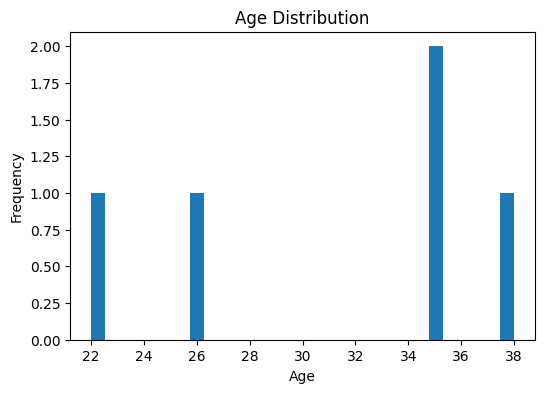

In [8]:

# Age distribution
plt.figure(figsize=(6,4))
df['Age'].plot(kind='hist', bins=30)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()


/var/folders/0q/b4wqh1gs5bvdwfddd5n47_wr0000gn/T/ipykernel_20640/2111551895.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=sorted(df['Pclass'].dropna().unique()))


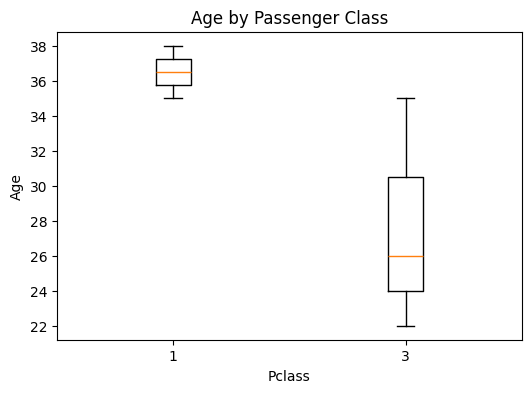

In [9]:

# Boxplot-like view using simple matplotlib: Age vs Pclass
plt.figure(figsize=(6,4))
groups = [df.loc[df['Pclass']==c, 'Age'].dropna() for c in sorted(df['Pclass'].dropna().unique())]
plt.boxplot(groups, labels=sorted(df['Pclass'].dropna().unique()))
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Age by Passenger Class')
plt.show()


## Target & Features

In [10]:

# Keep a subset of useful columns mapped to Kaggle schema
cols = ['Age','Pclass','Sex','SibSp','Parch','Fare','Embarked']
data = df[cols].copy()

# Simple engineered feature: Alone (1 if no siblings/spouses and no parents/children, else 0)
data['Alone'] = ((data['SibSp'].fillna(0) + data['Parch'].fillna(0)) == 0).astype(int)

y = data['Age']
X = data.drop(columns=['Age'])

num_features = ['Pclass','SibSp','Parch','Fare']
cat_features = ['Sex','Embarked','Alone']


## Preprocessing Pipeline

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)


## Train–Test Split

In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Model — Linear Regression

In [13]:

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print({'MAE': round(mae,3), 'RMSE': round(rmse,3), 'R2': round(r2,3)})


TypeError: got an unexpected keyword argument 'squared'

## Plots — Predicted vs Actual & Residuals

In [ ]:

# Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
mn, mx = np.nanmin([y_test.min(), y_pred.min()]), np.nanmax([y_test.max(), y_pred.max()])
plt.plot([mn, mx], [mn, mx])
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Predicted vs Actual Age')
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.show()


## Coefficients (Feature Effects)

In [ ]:

# Recover feature names and coefficients
ct = model.named_steps['preprocess']
ohe = ct.named_transformers_['cat'].named_steps['onehot']

num_names = num_features
cat_names = list(ohe.get_feature_names_out(cat_features))
all_feature_names = num_names + cat_names

coefs = model.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'feature': all_feature_names, 'coef': coefs})
coef_df.sort_values('coef', ascending=False).head(12)
